# Loss Functions
<hr>

Loss functions have an important role in machine learning as they guide the learning process of the model and define its objective.

There is a large number of loss functions available and choosing the proper one is crucial for training an accurate model. Different choices of a loss function can lead to different classification or regression models.

## What is a Loss Function?
Recall that in supervised machine learning problems, we are given a training set of $n$ labeled samples: $D = \{(x_1, y_1), (x_2, y_2), \cdots , (x_n, y_n)\}$, where $x_i$ represents the features of sample $i$ and $y_i$ represents the label of that sample. Our goal is to build a model whose predictions are as close as possible to the true labels.

A **loss function** measures the model's prediction error for a given sample, i.e., the difference between the model's predicted value and the true value for that sample. It takes two parameters: the true label of the sample y and the model's prediction $\hat{y}$:

$$ L(y, \hat{y})$$

During the training of the model, we tune its parameters so as to minimize the loss function on the given training samples.

*Note that a loss function calculates the error per sample, while a cost function calculates the error over the whole data set (although these two terms are sometimes used interchangeably).*

## Desired Properties of a Loss Function
Ideally, we would like the loss function to have the following properties:

- The loss function should reflect the objective the model is trying to achieve. For example, in regression problems our goal is to minimize the differences between the predictions and the target values, while in classification our goal is to minimize the number of misclassification errors.
- **Continuous and differentiable** everywhere. Most optimization algorithms, such as gradient descent, require the loss function to be differentiable.
- A **convex** loss function has only one global minimum point, thus optimization methods like gradient descent are guaranteed to return the globally optimal solution. In practice, this property is hard to achieve, and most loss functions are non-convex (i.e., they have multiple local minima).
- **Symmetric**, i.e., the error above the target should cause the same loss as the error below the target.
- Fast to compute

## Loss Functions and Maximum Likelihood
Many of the loss functions used in machine learning can be derived from the maximum likelihood principle. In **maximum likelihood estimation (MLE)**, we are trying to find a model with parameters $\theta$ that maximizes the probability of the observed data given the model: $P(D \mid \theta)$. To simplify the likelihood function, we typically take its logarithm, and then we try to maximize the log likelihood: $log P(D \mid \theta)$.

Therefore, we can define a loss function for a given sample $(x, y)$ as the negative log likelihood of observing its true label given the prediction of our model:

$$L(y, \hat{y}) = - \log P(y \mid \hat{y})$$

- Because negative logarithm is a monotonically decreasing function, maximizing the likelihood is equivalent to minimizing the loss.
- Note that to use this technique to define loss functions, we need to assume that the data set is generated from some known probability distribution.

## Regression Problems
<hr>

In regression problems, both the target label and the model's prediction take continuous values. The three most commonly used loss functions in regression problems are: 
1. Squared loss
2. Absolute loss
3. Huber loss

### Squared Loss
Squared loss is defined as the squared difference between the target label and its predicted value:

$$L_\text{squared}(y, \hat{y}) = (y - \hat{y})^2 $$

**Pros:**
- Continuous and differentiable everywhere
- Convex (has only one global minimum)
- Easy to compute
- Under the assumption that the labels have a Gaussian noise, squared loss is the negative maximum likelihood of the model given the data

**Cons:**
- Sensitive to outliers due to the squaring of the errors. A small number of samples that are distant from the other samples can cause a large change in the model (as will be demonstrated later)

### Absolute Loss
The absolute loss is defined as the absolute difference between the true label and the model's prediction:

$$L_\text{abs}(y, \hat{y}) = |y - \hat{y}|$$

**Pros:**
- Not overly affected by outliers
- Easy to compute

**Cons:**
- Non-differentiable at 0, which makes it hard use it in optimization methods such as gradient descent
- Does not have a maximum likelihood interpretation

### Huber Loss
Huber loss is a combination of squared loss and absolute loss. For loss values that are less than a predefined parameter called $\delta$, it uses the squared error, and for values greater than $\delta$ it uses the absolute error.

The mathematical definition of Huber loss is:

$$L_\text{huber}(y, \hat{y}) = \begin{cases}
\frac{1}{2} (y - \hat{y})^2 & |y - \hat{y}| \leq \delta \\
\delta |y - \hat{y}| - \frac{1}{2} \delta^2 & |y - \hat{y}| > \delta \\
\end{cases}
$$

$\delta$ is typically set to 1.

Huber loss is commonly used in deep learning where it helps to avoid the exploding gradient problem due to its insensitivity to large errors.

**Pros:**
- Continuous and differentiable everywhere
- Less sensitive to outliers than squared loss

**Cons:**
- Slower to compute
- Requires tuning of the hyperparameter $\delta$
- Does not have a maximum likelihood interpretation

The following graph shows the three regression loss functions:

<div style="align:center">
    <img src="media/regression_losses.png" width=600>
</div>

## Scikit-Learn Example
The `SGDRegressor` class fits a linear regression model to a given data set using stochastic gradient descent (SGD). Its loss parameter can be used to choose the loss function for the optimization. The options of this parameter are:
- `squared_error` (squared loss). This is the default option.
- `huber` (Huber loss)
- `epsilon_intensive` (the loss function used in Support Vector Regression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.5, 1.8, 2.4, 3.5, 4.2, 4.8, 5.8, 6.1, 7.2, 8.7, 10])
y = np.array([0.1, 0.2, 0.3, 0.4, 0.7, 1, 0.9, 1.2, 1.4, 1.8, 10])

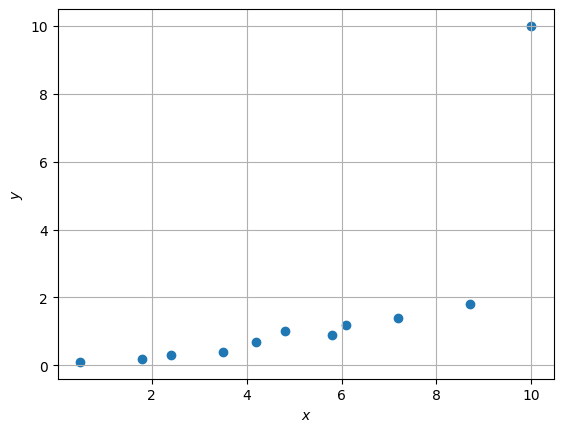

In [3]:
def plot_data(x, y):
    plt.scatter(x, y)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid()
    
plot_data(x, y)

Clearly the point (10, 10) is an outlier.

Next, we fit two `SGDRegressor` models to this data set: one with a squared loss function and another with a Huber loss.

In [4]:
from sklearn.linear_model import SGDRegressor

# Convert x to a column matrix
X = x.reshape(-1, 1)

reg = SGDRegressor(loss='squared_error')
reg.fit(X, y)

reg2 = SGDRegressor(loss='huber')
reg2.fit(X, y)

SGDRegressor(loss='huber')

In [5]:
def plot_regression_line(x, y, w0, w1, color, label):
    p_x = np.array([x.min(), x.max()])
    p_y = w0 + w1 * p_x
    plt.plot(p_x, p_y, color, label=label)

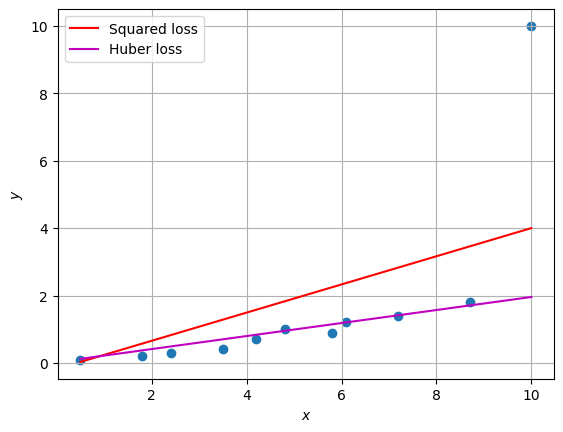

In [6]:
plot_data(x, y)
plot_regression_line(x, y, reg.intercept_, reg.coef_[0], 'r', label='Squared loss')
plot_regression_line(x, y, reg2.intercept_, reg2.coef_[0], 'm', label='Huber loss')
plt.legend()

It is clearly evident that the model trained with squared loss was much more affected by the outlier than the model trained with Huber loss.

## Binary Classification Problems
<hr>

In binary classification problems, the ground truth labels are binary (1/0 or 1/-1). The predicted value of the model can be either binary (a hard label) or a probability estimate that the given sample belongs to the positive class (a soft label).

Examples for classification models that provide only hard labels include support vector machines (SVMs) and K-nearest neighbors (KNNs), while models such as logistic regression and neural networks (with a sigmoid output) also provide a probability estimate.

### 0-1 Loss
The simplest loss function is the zero-one loss function (also called **misclassification error**):

$$L_{01}(y, \hat{y}) = I(y \neq \hat{y})$$

$I$ is the indicator function that returns 1 if its input is true, and 0 otherwise.

For every sample that the classifier gets wrong (misclassifies) a loss of 1 is incurred, whereas correctly classified samples lead to 0 loss. The 0-1 loss function is often used to evaluate classifiers, but is not useful in guiding optimization since it is non-differentiable and non-continuous.

### Log Loss
Log loss (also called **logistic loss** or **binary cross-entropy loss**) is used to train models that provide class probability estimates such as logistic regression.

Let us denote the probability estimate given by the model that the sample belongs to the positive class by $p$:

$$p = P(y=1)$$

Then, the log loss is defined as:

$$L_\text{log}(y, p) = -y \log{p} - (1-y) \log{(1-p)}$$

How did we get to this loss function? Again we are going to use the maximum likelihood principle. More specifically, we will show that log loss is the negative log likelihood under the assumption that the labels have a Bernoulli distribution (a probability distribution of a binary random variable that takes 1 with probability p and 0 with probability 1 − p). Mathematically, this can be written as follows:

$$L_\text{log}(y, p) = -\log{P(y \mid p)}$$

**Proof:** Given a model of the data (the labels) as a Bernoulli distribution with parameter $p$, the probability that a sample belongs to the positive class is simply $p$, i.e., $P(y=1 \mid p) = p$. Similarly, the probability that the sample belongs to the negative class is $P(y = 0 \mid p) = 1-p$. We can write these two equations more compactly as follows:

$$P(y \mid p) = p^y (1-p)^{1-y}$$

Therefore the log likelihood of the data is:

$$\log{P(y \mid p)} = y \log{p} + (1-y) \log{(1-p)}$$

The log loss is exactly the negative of this function!

### Hinge Loss
Hinge loss is used for training support vector machines (SVMs), where the goal is to maximize the margin of the area that separates the two classes while minimizing the margin violations.

<div style="align:center">
    <img src="media/hinge.png" width=600>
</div>

The hinge loss is defined as follows:

$$L_\text{hinge}(y, \hat{y}) = \max{(0, 1- y\hat{y})}$$

Note that $\hat{y}$ here is the raw output of the classifier's decision function, i.e., $\hat{y} = w^t x$ (SVM does not provide probability estimates).

When $y$ and $\hat{y}$ have the same sign (i.e., the model predicts the correct class) and $|\hat{y}| >= 1$, the hinge loss is 0. This means that correctly classified samples that are outside the margin do not contribute to the loss (the solution will be the same with these samples removed). However, for samples that are inside the margins $(|\hat{y}| < 1)$, even if the model's prediction is correct, there will still be a small loss. When $y$ and $\hat{y}$ have opposite signs, the hinge loss grows linearly with $\hat{y}$.

<div style="align:center">
    <img src="media/classification_losses.png" width=600>
</div>

Both log loss and hinge loss can be seen as continuous approximations to the 0-1 loss.

## Multi-Class Classification Problems
<hr>

In multi-class classification problems, the target label is 1 out of $k$ classes. The label is usually encoded using one-hot encoding, i.e., as a binary $k$-dimensional vector $y = (y_1, \cdots, y_k)^t$, where $y_i = 1$ for the true class $i$ and 0 elsewhere.

A probabilistic classifier outputs for each sample a $k$-dimensional vector with probability estimates of each class: $p = (p_1, \cdots, p_k)^t$. These probabilities sum to 1, i.e., $p_1 + \cdots + p_k = 1$.

### Cross-Entropy Loss
The loss function used to train such a classifier is called cross-entropy loss, which is an extension of log loss to the multi-class case. It is defined as follows:

$$L_\text{CE}(y, p) = - \sum_{i=1}^k y_i log(p_i)$$

For example, assume that we have a three-class problem, the true class of our sample is class 2 (i.e., $y = [0, 1, 0]$), and the prediction of our model is $p = [0.3, 0.6, 0.1]$. Then the cross-entropy loss induced by this sample is:

$$L_\text{CE} = -(0 . \log{(0.3)} + 1 . \log{(0.6)} + 0 . \log{(0.1)} = 0.5108$$

Similar to log loss, we can show that cross-entropy loss is the negative of the log-likelihood of the model, under the assumption that the labels are sampled from a categorical distribution (a generalization of Bernoulli distribution to $k$ possible outcomes).

**Proof:** Given a model of the data (the labels) as a categorical distribution with probabilities $p = (p_1, \cdots, p_k)$, the probability that a given sample belongs to class $i$ is $p_i$:

$$P(y = i \mid p) = p_i$$

Therefore, the probability that the true label of the sample is $y$ is:

$$P(y \mid p) = p_1^{y_1} . p_2^{y_2} \cdots p_k^{y_k} = \prod_{i=1}^k p_i^{y_i}$$

> Explanation: if the correct class of the given sample is $i$, then $y_i = 1$, and for all $j \neq i$, $y_j = 0$. Hence, $P(y \mid p) = p_i$, which is the probability that the sample belongs to class $i$.

Therefore, the log likelihood of our model is:

$$\log{P(y \mid p)} = \sum_{i=1}^k y_i \log{p_i}$$

The cross-entropy loss is exactly the negative of this function!